Import the required packages with their customary aliases as follows:

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [68]:
%matplotlib inline

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [69]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6868)

print(gdp_df.head(6))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2019  2065.036398              NaN
1     Afghanistan  2018  2033.779002              NaN
2     Afghanistan  2017  2058.383832              NaN
3     Afghanistan  2016  2057.062164              NaN
4     Afghanistan  2015  2068.265904              NaN
5     Afghanistan  2014  2102.385234              NaN


Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows

In [70]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

print(internet_df.head(6))



  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


Look at the shape of each DataFrame - how many rows? How many columns?

6 rows, 4 columns

Take a look at the datatypes for the columns in each DataFrame.


In [71]:
print(gdp_df.dtypes)

print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Take a look at the last 10 rows of each DataFrame in turn.

In [72]:
gdp_df.tail(10)



,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [73]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the value footnotes column from both DataFrames. Check that this worked as expected.



In [74]:
gdp_df.drop('Value Footnotes', axis=1)


,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [75]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [76]:
internet_df.drop('Value Footnotes', axis=1)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [77]:
internet_df = internet_df.drop('Value Footnotes', axis=1)

Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [78]:
gdp_df.rename({'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'}, axis=1)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [79]:
gdp_df = gdp_df.rename({'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'}, axis=1)

Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [80]:
internet_df.rename({'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'Internet_Users_Pct'}, axis=1)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [81]:
internet_df = internet_df.rename({'Country or Area': 'Country', 'Year': 'Year', 'Value' : 'Internet_Users_Pct'}, axis=1)

Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [82]:
pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621


In [83]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

Look at the first five rows of your new DataFrame to confirm it merged correctly.m

In [84]:
print(gdp_and_internet_use.head(5))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2065.036398                 NaN
1  Afghanistan  2018     2033.779002                 NaN
2  Afghanistan  2017     2058.383832                 NaN
3  Afghanistan  2016     2057.062164                 NaN
4  Afghanistan  2015     2068.265904                 NaN


Look at the last five rows to make sure the data is clean and as expected.



In [85]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.



In [86]:
gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2004) | (gdp_and_internet_use["Year"] == 2009) | (gdp_and_internet_use["Year"] == 2014)]




,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.



In [87]:
gdp_and_internet_use_2004 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2004)]

gdp_and_internet_use_2009 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2009)]

gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2014)]

Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).



In [88]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014.Internet_Users_Pct == gdp_and_internet_use_2014.Internet_Users_Pct.max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014      49652.1495               98.16


Which country had the lowest percentage of internet users in 2014? What was the percentage?



In [89]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014.Internet_Users_Pct == gdp_and_internet_use_2014.Internet_Users_Pct.min()])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                 0.0


Repeat for 2004 and 2009.



In [90]:
print(gdp_and_internet_use_2004[gdp_and_internet_use_2004.Internet_Users_Pct == gdp_and_internet_use_2004.Internet_Users_Pct.max()])

print(gdp_and_internet_use_2004[gdp_and_internet_use_2004.Internet_Users_Pct == gdp_and_internet_use_2004.Internet_Users_Pct.min()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019  Sweden  2004    44496.023401               83.89
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7088  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [91]:
print(gdp_and_internet_use_2009[gdp_and_internet_use_2009.Internet_Users_Pct == gdp_and_internet_use_2009.Internet_Users_Pct.max()])


print(gdp_and_internet_use_2009[gdp_and_internet_use_2009.Internet_Users_Pct == gdp_and_internet_use_2009.Internet_Users_Pct.min()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123                93.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7083  Dem. People's Rep. of Korea  2009             NaN                 0.0


Which country had the highest gdp per capita in 2014? What was the gdp per capita?



In [92]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014.GDP_Per_Capita == gdp_and_internet_use_2014.GDP_Per_Capita.max()])


               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014    156514.13385                 NaN


Which country had the lowest gdp per capita in 2014? What was the gdp per capita?



In [93]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014.GDP_Per_Capita == gdp_and_internet_use_2014.GDP_Per_Capita.min()])


                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN


Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

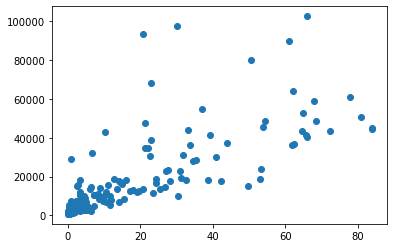

In [94]:
plt.scatter(gdp_and_internet_use_2004.Internet_Users_Pct,gdp_and_internet_use_2004.GDP_Per_Capita)

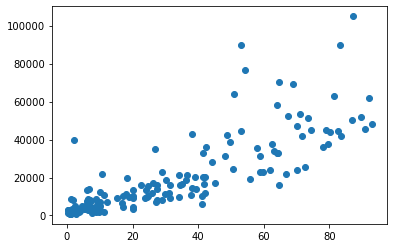

In [95]:
plt.scatter(gdp_and_internet_use_2009.Internet_Users_Pct,gdp_and_internet_use_2009.GDP_Per_Capita)

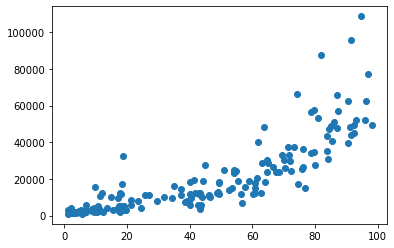

In [96]:
plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct,gdp_and_internet_use_2014.GDP_Per_Capita)

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.



Yes, internet use appears to have fallen in 2009. There is a positive correlation between internet usage and gdp. Internet use grew between 2009 and 2014.

Look at the distribution of gdp per capita values for 2014. Is it unimodal?



Yes, it seems to be unimodal with the highest distribution being a very low gdp

Look at the distribution of Internet Use for 2014. Is it unimodal?



I would say no, I think the distribution is multi-modal

What are the top 5 countries in terms of internet use in 2014?



In [97]:
gdp_and_internet_use_2014.sort_values(by=['Internet_Users_Pct'], ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.



In [98]:
gdp_and_internet_use_triple = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2004) | (gdp_and_internet_use["Year"] == 2009) | (gdp_and_internet_use["Year"] == 2014)]

In [99]:
top_5_internet = gdp_and_internet_use_triple[(gdp_and_internet_use_triple["Country"] == 'Iceland')| (gdp_and_internet_use_triple["Country"] == 'Bermuda')|(gdp_and_internet_use_triple["Country"] == 'Norway')|(gdp_and_internet_use_triple["Country"] == 'Denmark')|(gdp_and_internet_use_triple["Country"] == 'Andorra')]

top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
1452,Denmark,2014,52214.537753,95.990000
1457,Denmark,2009,50274.075696,86.840000
1462,Denmark,2004,50607.628971,80.930000
2625,Iceland,2014,49652.149500,98.160000
2630,Iceland,2009,48177.084123,93.000000
2635,Iceland,2004,45145.545658,83.880000
4648,Norway,2014,62589.373548,96.300000


Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Andorra!



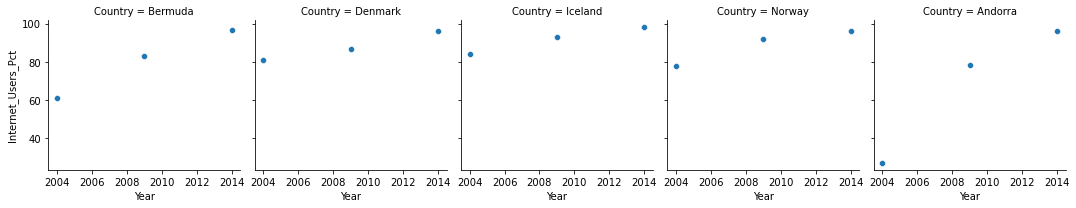

In [114]:
grid = sns.FacetGrid(top_5_internet, col='Country')

grid.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use? North Korea



In [115]:
gdp_and_internet_use_2014.sort_values(by=['Internet_Users_Pct'], ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


In [117]:
bot_5_internet = gdp_and_internet_use_triple[gdp_and_internet_use_triple["Country"].isin(["Dem. People's Rep. of Korea",'Eritrea','Timor-Leste', 'Burundi', 'Somalia'])

SyntaxError: unexpected EOF while parsing (<ipython-input-117-e69d1fc72f11>, line 1)

In [119]:
bot_5_internet = gdp_and_internet_use_triple[(gdp_and_internet_use_triple["Country"] == "Dem. People's Rep. of Korea")| (gdp_and_internet_use_triple["Country"] == 'Eritrea')|(gdp_and_internet_use_triple["Country"] == 'Timor-Leste')|(gdp_and_internet_use_triple["Country"] == 'Burundi')|(gdp_and_internet_use_triple["Country"] == 'Somalia')]

bot_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
6219,Timor-Leste,2014,3264.568070,1.140000
6224,Timor-Leste,2009,2724.770973,0.185252
6229,Timor-Leste,2004,2258.608056,NaN
7079,Dem. People's Rep. of Korea,2014,NaN,0.000000
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
7137,Eritrea,2014,NaN,0.990000


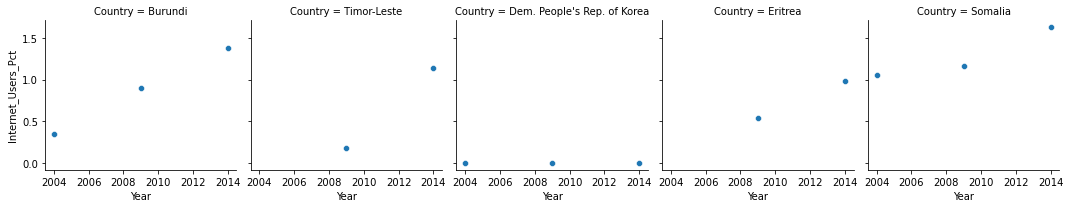

In [120]:
grid = sns.FacetGrid(bot_5_internet, col='Country')

grid.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')

Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.



In [122]:
top_5_gdp_2014 = gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'], ascending = False).head(5)

top_5_gdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [124]:
top_5_gdp = gdp_and_internet_use_triple[(gdp_and_internet_use_triple["Country"] == "Macao SAR, China")| (gdp_and_internet_use_triple["Country"] == 'Luxembourg')|(gdp_and_internet_use_triple["Country"] == 'Qatar')|(gdp_and_internet_use_triple["Country"] == 'Singapore')|(gdp_and_internet_use_triple["Country"] == 'Bermuda')]

top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
3691,Luxembourg,2014,108760.916030,94.670000
3696,Luxembourg,2009,104932.811953,87.310000
3701,Luxembourg,2004,102708.212547,65.880000
3721,"Macao SAR, China",2014,156514.133850,NaN
3726,"Macao SAR, China",2009,95939.340822,NaN
3731,"Macao SAR, China",2004,72944.409424,NaN
5138,Qatar,2014,95578.416973,91.490000


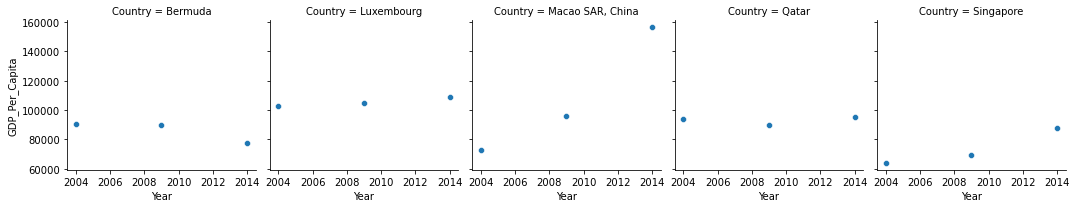

In [125]:
grid = sns.FacetGrid(top_5_gdp, col='Country')

grid.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')

In [127]:
bot_5_gdp_2014 = gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'], ascending = True).head(5)

bot_5_gdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [130]:
bot_5_gdp = gdp_and_internet_use_triple[(gdp_and_internet_use_triple["Country"] == "Central African Republic")| (gdp_and_internet_use_triple["Country"] == 'Burundi')|(gdp_and_internet_use_triple["Country"] == 'Malawi')|(gdp_and_internet_use_triple["Country"] == 'Dem. Rep. Congo')|(gdp_and_internet_use_triple["Country"] == 'Niger')]

bot_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
1047,Central African Republic,2014,822.610458,NaN
1052,Central African Republic,2009,1161.189475,NaN
1057,Central African Republic,2004,1037.846766,NaN
1422,Dem. Rep. Congo,2014,1029.790785,NaN
1427,Dem. Rep. Congo,2009,835.611696,NaN
1432,Dem. Rep. Congo,2004,757.685942,NaN
3781,Malawi,2014,1027.208496,5.830000


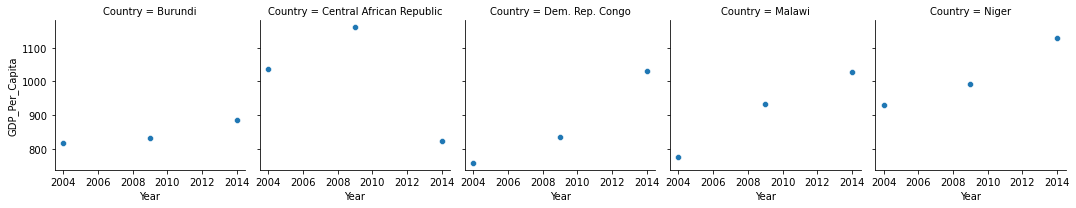

In [131]:
grid = sns.FacetGrid(bot_5_gdp, col='Country')

grid.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')

Macau has greatly risen in GDP pre capita, and Central African Republic has greatly fallen

For Macua - The Casino Boom, and becoming the Las Vegas of Asia

For Central African Republic - Civil War